<table>
 <tr align=left><td><img align=left src="https://mirrors.creativecommons.org/presskit/buttons/80x15/png/by.png">
 <td>This notebook is provided under the Creative Commons Attribution license, CC-BY 4.0. All code is made available under MIT License (c) Arash Sarshar.</td>
 <td> </td>
</table>

## Some ground rules for writing good responses in your assignments

* Make sure that you provide ample comments to communicate what you are trying to do clearly. Do not assume that anyone reading the code would immediately  understand the context.
* If you need to create new variables, think about naming them in descriptive ways.
* Each and every output should be reproducible. If you are creating a plot, make sure you include the code for that plot. 
* Cite your references, including AI ones.


## Let's load the lemon picture again

In [1]:
import numpy as np
from numpy.linalg import *
from PIL import Image
import matplotlib.pyplot as plt

PIL stands for Python Imaging Library, and it provides the necessary tools and functions for handling images in Python. It is used for image processing, manipulation, and analysis.

In [2]:
image = np.array(Image.open('../../Images/lemon.jpeg'))

Shape of the original image: (100, 100, 3)
Shape of the single channel image: (100, 100)


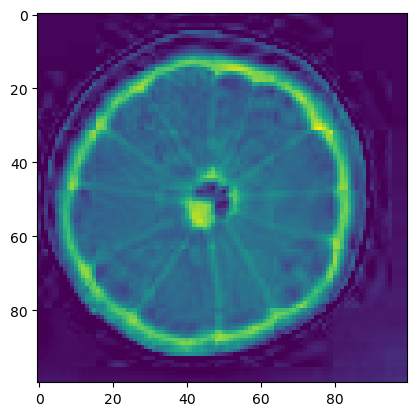

In [7]:
print("Shape of the original image:",image.shape)
img_single_channel=image[:,:,-1]
print("Shape of the single channel image:",img_single_channel.shape)
plt.imshow(img_single_channel)
plt.show()

## Part 1

Write a block of commands that does the following.  

1. Print the shape of the image 
1. Create a new variable called `img_single_channel` that is equivalent to __the last color channel__ of `image`
3. Print the shape of `img_single_channel` to check that it has the same number of pixels as the original image
4. Use `plt.imshow` to plot  `img_single_channel`





## Part 2

Write a block of commands that does the following.  

1. Create a new variable called `img_average_channel` that is equivalent to __the average of all three color channels__ of `image`
3. Print the shape of `img_average_channel` to check that it has the same number of pixels as the original image
4. Use `plt.imshow` to plot  the original image in `image`, compare the result with the result of `Part 1`, and comment on the differences and which one you would say is better

Shape of the average channel image: (100, 100)


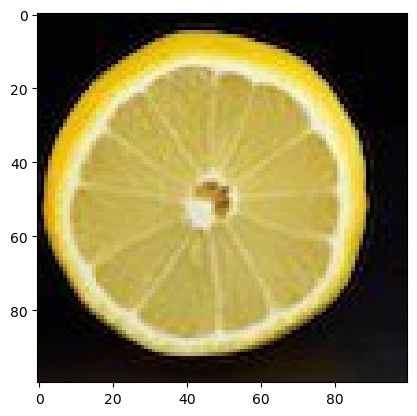

'After comparing the result of Part 1 (displaying the last color channel) with the result of Part 2 (displaying the average channel), it appears that the Part 1 image looks like a negative of the photo in Part 2. This is because the last color channel often represents the inverse of the average brightness of the image, which can create a negative-like effect when displayed as a grayscale image.'

In [16]:
img_average_channel= np.mean(image,axis=2)
print("Shape of the average channel image:",img_average_channel.shape)
plt.imshow(image)
plt.show()
'''After comparing the result of Part 1 (displaying the last color channel) with the result of Part 2 (displaying the average channel), it appears that the Part 1 image looks like a negative of the photo in Part 2. This is because the last color channel often represents the inverse of the average brightness of the image, which can create a negative-like effect when displayed as a grayscale image.'''

## Part 3

1. Describe what an identity matrix is. What does multiplying with an identity matrix do?
1. Create an identity matrix called `identity_matrix` that has the same size as `img_average_channel`.
2. Print a random row out of `identity_matrix` and describe your observations.

In [25]:
'''1. An identity matrix is a square matrix where all diagonal elements are 1, and all non-diagonal elements are 0. When you multiply any matrix by the appropriate-sized identity matrix, the original matrix remains unchanged. It serves as the equivalent of the number 1 in matrix multiplication, preserving the original matrix's values and properties.'''
identity_matrix=np.eye(img_average_channel.shape[0],img_average_channel.shape[1])
rows_identity=identity_matrix.shape[0]
random_row_index=np.random.randint(0,rows_identity)
print(identity_matrix[random_row_index])
'''random row of the matrix'''

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


'random row of the matrix'

## Part 4

We are going to use `identity_matrix` to scramble the rows and columns of `img_average_channel`. 

1. First, create a numpy array that contains the numbers $0,1, \cdots, N$ where $N$ is the number of rows in the image.

2. Use `numpy.random.shuffle` to shuffle the indices. Call the shuffled array, `rows`

4. Print `rows` and inspect the elements.

In [27]:
rows_img=img_average_channel.shape[0]
array_numbers=np.arange(rows_img)
np.random.shuffle(array_numbers)
rows=array_numbers

## Part 5

1. Use your array of random row indices to create a new matrix `T` from `identity_matrix`. Overall, `T` has the same elements as `identity_matrix`, but the order of the rows of `T` should be according to the variable `rows`
2. Take a moment to think about what we are doing here. Describe in your own words what matrix `T` is.
3. Sanity check, print the shape of `T` and make sure it is the same size as `identity_matrix` and `img_average_channel`. If you need to,  reshape it to have the same size.


In [37]:
T=identity_matrix[rows]
'''Matrix T is a shuffled version of the identity matrix. It has the same dimensions but with rows rearranged based on the shuffled row indices. T represents a permutation of rows, allowing you to apply this specific row order to other matrices or perform operations involving this permutation.'''
print("Shape of T:",T.shape)
if T.shape!=img_average_channel.shape:
    T=T[:img_average_channel.shape[0],:img_average_channel.shape[1]]
assert T.shape==img_average_channel.shape

Shape of T: (100, 100)


## Part 6

1. Matrix multiply `T` and `img_average_channel` and store the result in `transformed_image`. Check the shape of the result.
2. Plot `transformed_image` and describe the pattern you see. 
3. Think about what each dot product in the matrix multiplication is doing. Describe in your own words what this transformation is doing to the original image. 

Shape of transformed_image: (100, 100)


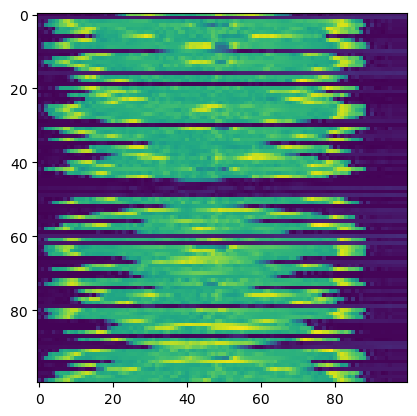

'The matrix multiplication with `T` rearranges the rows of the original image based on the shuffled order of indices, creating a permutation of the rows. Importantly, this transformation preserves the pixel values within each row, resulting in a new pattern in the transformed image where pixels from different rows are mixed in a different order. Essentially, it shuffles the spatial arrangement of pixels within the image while maintaining the integrity of individual pixel values, producing a visually distinct arrangement from the original image.'

In [39]:
transformed_image=np.dot(T,img_average_channel)
print("Shape of transformed_image:",transformed_image.shape)
plt.imshow(transformed_image)
plt.show()
'''Pattern is scattered'''
'''The matrix multiplication with `T` rearranges the rows of the original image based on the shuffled order of indices, creating a permutation of the rows. Importantly, this transformation preserves the pixel values within each row, resulting in a new pattern in the transformed image where pixels from different rows are mixed in a different order. Essentially, it shuffles the spatial arrangement of pixels within the image while maintaining the integrity of individual pixel values, producing a visually distinct arrangement from the original image.'''

## Part 7

1. We now want to retrieve the original image. Is matrix `T` invertible? How would you show that it is invertible?
2. Compute the inverse and store the matrix in `Tinv`.
3. Perform the inverse of the scrambling operation and plot the result to show that you retrieved the original image.

Matrix T is invertible.
Shape of Tinv: (100, 100)


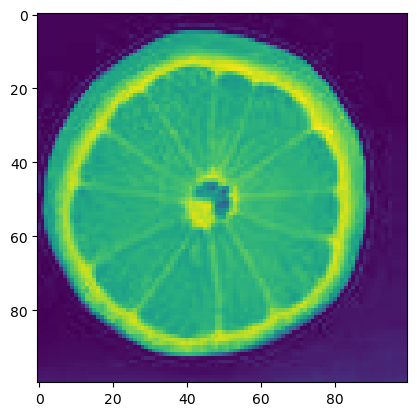

In [49]:
if np.linalg.matrix_rank(T) == min(T.shape):
    print("Matrix T is invertible.")
else:
    print("Matrix T is not invertible.")
Tinv=np.linalg.inv(T)
print("Shape of Tinv:",Tinv.shape)
retrieved_image=np.dot(Tinv,transformed_image)
plt.imshow(retrieved_image)
plt.show()

## Part 8: Extra Points

* We want to perform the same operations but on the columns of the original image. How would you do the matrix algebra? Plot the scrambled image for the proof of concept.


## Extra Points

* Now can you perform the scrambling on __both the columns and rows__ of the original image?  Write the code and plot the scrambled image. Then invert the operations and show that you can recover the original image. 

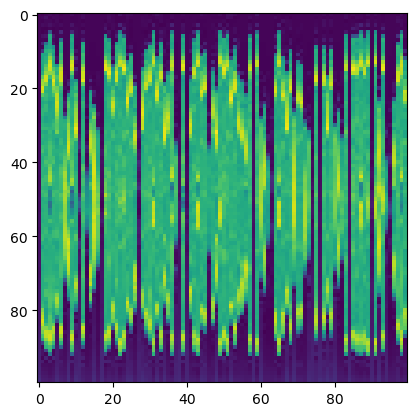

In [53]:
num_col=img_average_channel.shape[1]
T_col=np.eye(num_col)
np.random.shuffle(T_col)
transformed_img_col=np.dot(img_average_channel,T_col)
plt.imshow(transformed_img_col)
plt.show()

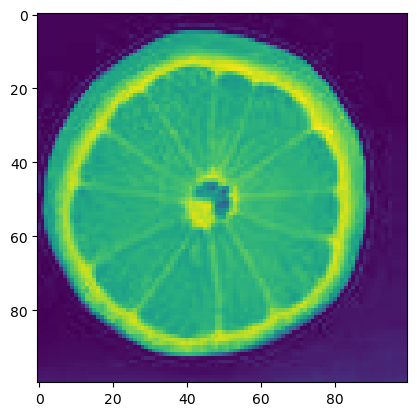

In [54]:
T_col_inv=np.linalg.inv(T_col)
retrieved_img_col=np.dot(transformed_img_col,T_col_inv)
plt.imshow(retrieved_img_col)
plt.show()